In [1]:
from hopper import Hopper1
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [ ]:
xml_path = "./xml/hopper1/scene2.xml"
sim = Hopper1(xml_path)

当前时间为 2023-12-06_10-38-31


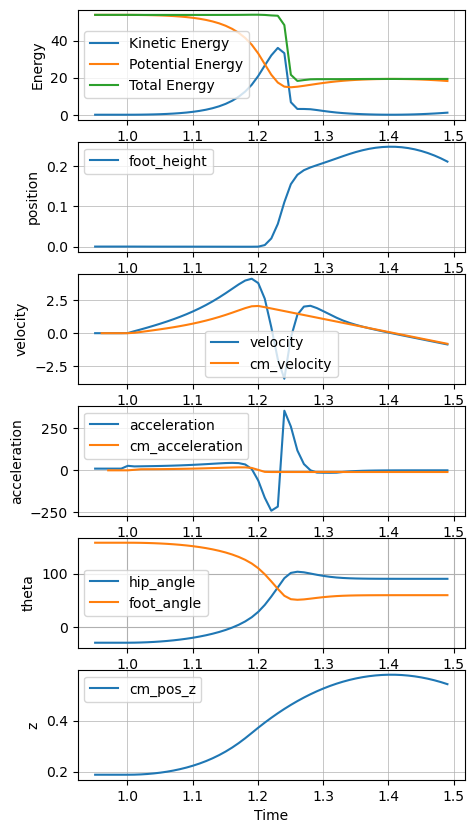

In [2]:
sim.is_render = False
sim.is_plot_data = False
sim.simend = 1.5
sim.Hz = 100
sim.model.tendon_stiffness[0] = 50
sim.reset()
sim.simulate()

In [24]:
# 储存所有数据的列表，不同批次的实验使用不同的二维列表
cm_height = []
cm_velocity = []
cm_acceleration = []
tenser_stiffness = []
time = []

In [25]:
# 只保留离开地面前的加速度和速度随着高度的变化 只保留jump_height_datas在0附近时的数据
for i in range(len(sim.hopperdata.jump_height_datas)):
    if abs(sim.hopperdata.jump_height_datas[i]) >= 0.01:
        break

time.append(sim.hopperdata.time_datas[:i])
cm_height.append(sim.hopperdata.cm_pos_z_datas[:i])
cm_velocity.append(sim.hopperdata.cm_vel_z_datas[:i])
cm_acceleration.append(sim.hopperdata.cm_acc_z_datas[:i])
temp = [sim.model.tendon_stiffness[0]]*i
tenser_stiffness.append(temp)

[[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]]


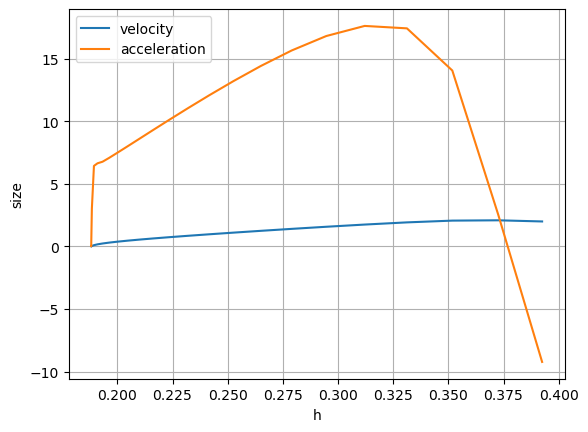

In [26]:
plt.figure(2)
# plt.xticks(range(1, 6))
# plt.yticks(range(2, 11, 2))

# plt.subplot(3, 1, 1)
plt.grid(True)
plt.plot(cm_height[0], cm_velocity[0], label='velocity')
plt.plot(cm_height[0], cm_acceleration[0], label='acceleration')
plt.legend()
plt.xlabel('h')
plt.ylabel('size')

# plt.subplot(3, 1, 2)
# plt.grid(True)
# plt.plot(cm_height, cm_acceleration, label='acceleration')
# plt.xlabel('h')
# plt.ylabel('size')

plt.show()

## 改变弹簧刚度实验

0
50.0
当前时间为 2023-12-06_12-10-58
1
70.0
当前时间为 2023-12-06_12-11-05
2
90.0
当前时间为 2023-12-06_12-11-11
3
110.0
当前时间为 2023-12-06_12-11-18
4
130.0
当前时间为 2023-12-06_12-11-24
5
150.0
当前时间为 2023-12-06_12-11-31
6
170.0
当前时间为 2023-12-06_12-11-38
7
190.0
当前时间为 2023-12-06_12-11-45
8
210.0
当前时间为 2023-12-06_12-11-51
9
230.0
当前时间为 2023-12-06_12-11-58


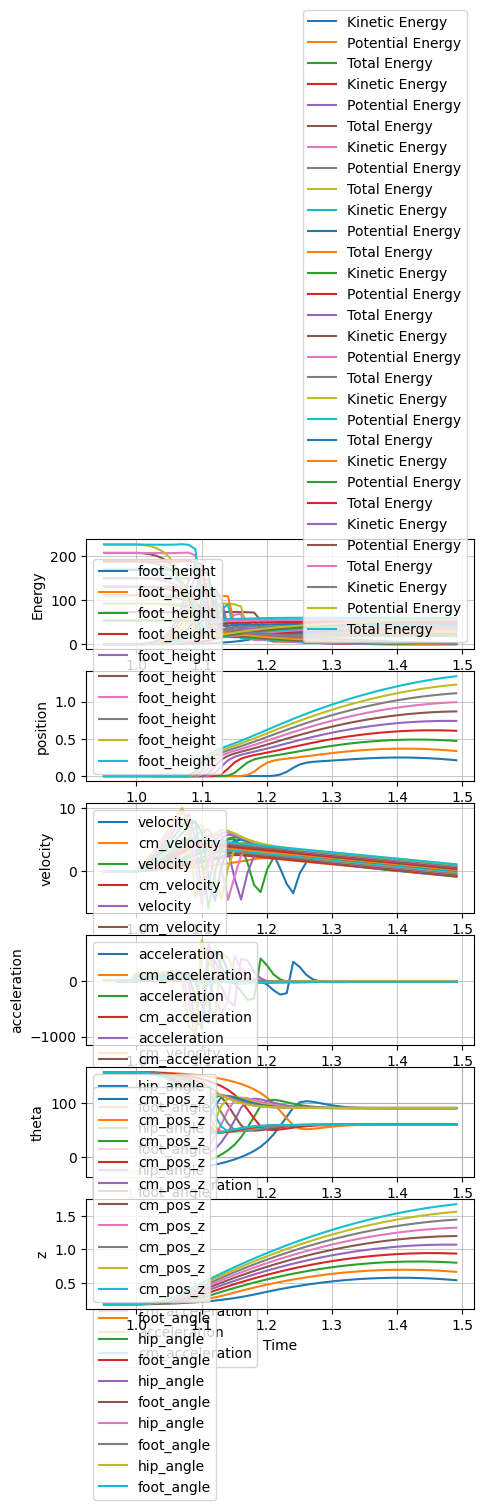

In [29]:
for j in range(10):
    print(j)
    sim.model.tendon_stiffness[0] = 50+j*20
    print(sim.model.tendon_stiffness[0])
    sim.reset()
    sim.simulate()
    for i in range(len(sim.hopperdata.jump_height_datas)):
        if abs(sim.hopperdata.jump_height_datas[i]) >= 0.01:
            break

    time.append(sim.hopperdata.time_datas[:i])
    cm_height.append(sim.hopperdata.cm_pos_z_datas[:i])
    cm_velocity.append(sim.hopperdata.cm_vel_z_datas[:i])
    cm_acceleration.append(sim.hopperdata.cm_acc_z_datas[:i])
    temp = [sim.model.tendon_stiffness[0]]*i
    tenser_stiffness.append(temp)

### 离开地面前质心高度和速度的关系
基本是正相关

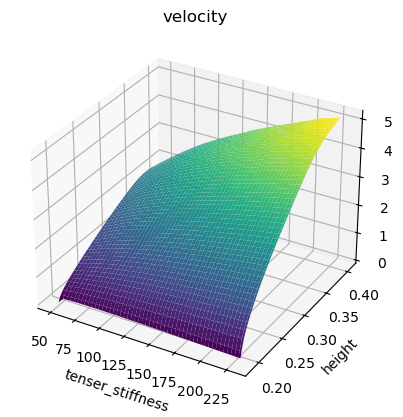

In [84]:
# 剔除None的数据
y = [item for sublist in cm_height for item in sublist]
z = [item for sublist in cm_velocity for item in sublist]
x = [item for sublist in tenser_stiffness for item in sublist]

indices_to_exclude = []
for index, item in enumerate(z):
    if item is None:
        indices_to_exclude.append(index)
x = np.delete(x, indices_to_exclude)
y = np.delete(y, indices_to_exclude)
z = np.delete(z, indices_to_exclude)

X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
Z = griddata((x, y), z, (X, Y), method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('tenser_stiffness')
ax.set_ylabel('height')
ax.set_title('velocity')
plt.show()

### 离开地面前质心高度和加速度的关系
随着质心高度增大，质心加速度先急剧增大后平缓增大，最后减小

随着弹簧刚度的增大，加速度最大值提前

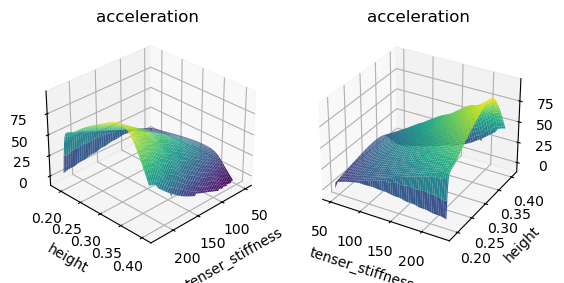

In [88]:
y = [item for sublist in cm_height for item in sublist]
x = [item for sublist in tenser_stiffness for item in sublist]
z = [item for sublist in cm_acceleration for item in sublist]
# 剔除None的数据
indices_to_exclude = []
for index, item in enumerate(z):
    if item is None:
        indices_to_exclude.append(index)
x = np.delete(x, indices_to_exclude)
y = np.delete(y, indices_to_exclude)
z = np.delete(z, indices_to_exclude)

X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
Z = griddata((x, y), z, (X, Y), method='cubic')
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('tenser_stiffness')
ax1.set_ylabel('height')
ax1.set_title('acceleration')
ax1.view_init(elev=30, azim=45)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('tenser_stiffness')
ax2.set_ylabel('height')
ax2.set_title('acceleration')
plt.show()
